# User Churn Prediction

## Introducation
In this project, we use machine learning models to identify customers who are likely to stop using telecommunication service in the future. Furthermore, we will analyze top factors that influence user retention. 

The analysis is important becasue we want to find if we can predict user behaviors and check the accuracy of prediction. Besides, we also want to understand the reasons behind users' behaviors. Using the results of the analysis, cell phone plan service providers can to improve their service, attract and retain more customers to stay in the business.

## Background
User churn is also called customer attrition, or customer turn over. It is a widely used analysis in business. 

Banks, telephone service companies, Internet service providers, etc., often perform user churn analysis and use customer churn rate as one of their key business metrics. It is because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which perform the analysis and use the result to guide the attempt to win back defecting clients. For these reasons, churn churn is extensively studied in Operational Research, Business Intelligence, management, and advertising. 

## Analysis Process

<ul>
<li>[Step 1: Data Exploration](#Step-1:-Data-Exploration)
<li>[Step 2: Feature Preprocessing](#Step-2:-Feature-Preprocessing)
<li>[Step 3: Model Training and Results Evaluation](#Step-3:-Model-Training-and-Result-Evaluation)
<li>[Step 4: Feature Selection](#Step-4:-Feature-Selection)
<li>[Step 5: Use Probabilities as Prediction Results](#Step-5:-Use-Probabilities-as-Prediction-Results)
</ul>

### Step 1: Data Exploration
The purpose of this step is to understand the dataset and clean messy data. To understand the dataset, the plan is to take a slice of data and simply examine the values; also various data visualizations are used, for example, scatter plot and box plot, to check data distribution. To clean messy data, the step checks missing data, identify outliers, and manually split, combine, and change some data field.
### Step 1.1: Understand the Raw Dataset
Data is from [UIC machine learning repository](https://archive.ics.uci.edu/ml/datasets.html).
UCI dataset is a part of Open Science and, specifically, Open Data program. The churn dataset uses [Open Data Commons Open Database License (ODbL)](https://en.wikipedia.org/wiki/Open_Database_License)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

churn_df = pd.read_csv('data/churn.all')

In [2]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [3]:
print "Num of rows: " + str(churn_df.shape[0]) # row count
print "Num of columns: " + str(churn_df.shape[1]) # col count

Num of rows: 5000
Num of columns: 21


### Step 1.2: Data cleaning

We found there are extra white space before the "voice_mail_plan"variable. We removed extra whitespace and prepared the feature for further analysis.

In [4]:
churn_df['voice_mail_plan'][4]

' no'

In [5]:
churn_df['voice_mail_plan'] = churn_df['voice_mail_plan'].map(lambda x: x.strip())
churn_df['intl_plan'] = churn_df['intl_plan'].map(lambda x: x.strip())
churn_df['churned'] = churn_df['churned'].map(lambda x: x.strip())
# x.strip remove space

### Step 1.3:  Understand the features
Here we checked features' distributions and correlations between features. Visualizations are used extensively as a part of human-centered considerations, as we want to not only get a good result, but also understand the data and modeling process.

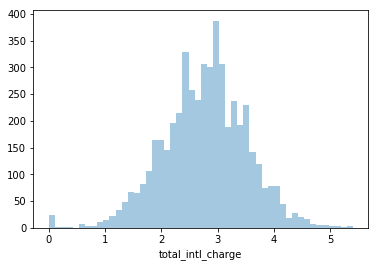

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

sb.distplot(churn_df['total_intl_charge'], kde=False)

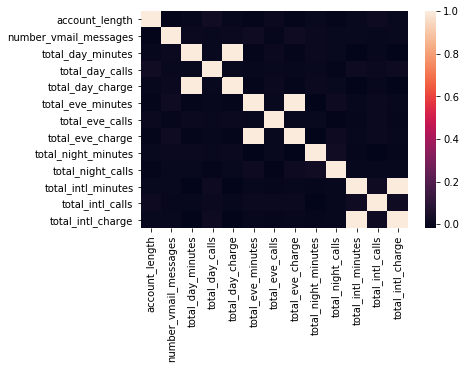

In [7]:
corr = churn_df[["account_length", "number_vmail_messages", "total_day_minutes",
                    "total_day_calls", "total_day_charge", "total_eve_minutes",
                    "total_eve_calls", "total_eve_charge", "total_night_minutes",
                    "total_night_calls", "total_intl_minutes", "total_intl_calls",
                    "total_intl_charge"]].corr()

sb.heatmap(corr)

In [8]:
corr

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,total_intl_charge
account_length,1.000000,-0.014575,-0.001017,0.028240,-0.001019,-0.009591,0.009143,-0.009587,0.000668,-0.007825,0.001291,0.014277,0.001292
number_vmail_messages,-0.014575,1.000000,0.005381,0.000883,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.002463,0.000124,0.002505
total_day_minutes,-0.001017,0.005381,1.000000,0.001935,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,-0.019486,-0.001303,-0.019415
total_day_calls,0.028240,0.000883,0.001935,1.000000,0.001936,-0.000699,0.003754,-0.000695,0.002804,-0.008308,0.013097,0.010893,0.013161
total_day_charge,-0.001019,0.005377,1.000000,0.001936,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,-0.019490,-0.001307,-0.019419
total_eve_minutes,-0.009591,0.019490,-0.010750,-0.000699,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,0.000137,0.008388,0.000159
total_eve_calls,0.009143,-0.003954,0.008128,0.003754,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,-0.007458,0.005574,-0.007507
total_eve_charge,-0.009587,0.019496,-0.010760,-0.000695,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,0.000132,0.008393,0.000155
total_night_minutes,0.000668,0.005541,0.011799,0.002804,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,-0.006721,-0.017214,-0.006655
total_night_calls,-0.007825,0.002676,0.004236,-0.008308,0.004235,0.013420,-0.013682,0.013422,0.026972,1.000000,0.000391,-0.000156,0.000368


In [9]:
from scipy.stats import pearsonr
print pearsonr(churn_df['total_day_minutes'], churn_df['number_vmail_messages'])[0]

0.00538137596065


### Step 2: Feature Preprocessing
Step 2 includes labelling categorical variables using one hot encoding. There are binary fields which are tranferred into 0 or 1. There are also fields not needed for the modeling. They are dropped in this step. Lastly, scaling features to normal is needed before feeding the features into the model.

In [10]:
churn_df.head()

,state,account_length,area_code,phone_number,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
y = np.where(churn_df['churned'] == 'True.',1,0)
to_drop = ['state','area_code','phone_number','churned']
churn_feat_space = churn_df.drop(to_drop, axis=1)
yes_no_cols = ["intl_plan","voice_mail_plan"]
churn_feat_space[yes_no_cols] = churn_feat_space[yes_no_cols] == 'yes'
X = churn_feat_space.as_matrix().astype(np.float)

In [12]:
churn_feat_space[yes_no_cols] 

,intl_plan,voice_mail_plan
0,False,True
1,False,True
2,False,False
3,True,False
4,True,False
5,True,False
6,False,True
7,True,False
8,False,False
9,True,True


In [13]:
X

array([[ 128.  ,    0.  ,    1.  , ...,    3.  ,    2.7 ,    1.  ],
       [ 107.  ,    0.  ,    1.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,    0.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  61.  ,    0.  ,    0.  , ...,    4.  ,    3.67,    1.  ],
       [ 109.  ,    0.  ,    0.  , ...,    6.  ,    2.3 ,    0.  ],
       [  86.  ,    0.  ,    1.  , ...,   16.  ,    2.51,    0.  ]])

In [14]:
X.shape

(5000, 17)

In [15]:
churn_feat_space.head()

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [16]:
X

array([[ 128.  ,    0.  ,    1.  , ...,    3.  ,    2.7 ,    1.  ],
       [ 107.  ,    0.  ,    1.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,    0.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  61.  ,    0.  ,    0.  , ...,    4.  ,    3.67,    1.  ],
       [ 109.  ,    0.  ,    0.  , ...,    6.  ,    2.3 ,    0.  ],
       [  86.  ,    0.  ,    1.  , ...,   16.  ,    2.51,    0.  ]])

Scale the data to normal and prepare the features for modeling.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print "Feature space holds %d observations and %d features" % X.shape
print "Unique target labels:", np.unique(y)

Feature space holds 5000 observations and 17 features
Unique target labels: [0 1]


In [18]:
X.shape

(5000, 17)

In [19]:
X[:,16]

array([-0.43667564, -0.43667564, -1.20223603, ..., -0.43667564,
       -1.20223603, -1.20223603])

### Step 3: Model Training and Result Evaluation
This is the most important of the analysis process. I started with the simple linear regression, and then try Logistic regression, K-nearest neighbor (k-NN), and Random Forest algorithms. I used k-fold cross validation, tuned hyper parameters, and evaluated the results using Confusion Matrix.


### Step 3.1: K-fold Cross-Validation

In [20]:
X

array([[ 0.69894149, -0.32324017,  1.66712012, ..., -0.58423577,
        -0.0955088 , -0.43667564],
       [ 0.16984882, -0.32324017,  1.66712012, ..., -0.58423577,
         1.24598231, -0.43667564],
       [ 0.92569549, -0.32324017, -0.5998368 , ...,  0.22991664,
         0.69597096, -1.20223603],
       ..., 
       [-0.98911606, -0.32324017, -0.5998368 , ..., -0.17715957,
         1.20573758, -0.43667564],
       [ 0.2202386 , -0.32324017, -0.5998368 , ...,  0.63699285,
        -0.63210525, -1.20223603],
       [-0.35924384, -0.32324017,  1.66712012, ...,  4.70775494,
        -0.35039211, -1.20223603]])

In [21]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
from sklearn.cross_validation import KFold

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

/Users/dianazhang/anaconda/envs/laidata/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Step 3.2: Run Three Supervised Learning Models and Calculate Accuracy

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) 

LR_CV_result = run_cv(X,y,LogisticRegression)
RF_CV_result = run_cv(X,y,RandomForestClassifier)
KNN_CV_result = run_cv(X,y,KNeighborsClassifier) 

In [24]:
print "Logistic Regression (L2 is default): " + str(accuracy(y, LR_CV_result))
print "Random forest: " + str(accuracy(y, RF_CV_result))
print "K-nearest-neighbors: " + str(accuracy(y, KNN_CV_result))

Logistic Regression (L2 is default): 0.8644
Random forest: 0.9518
K-nearest-neighbors: 0.897


In [25]:
churn_df_LR_CV = churn_df
churn_df_LR_CV['LR_Predicted_churned'] = LR_CV_result == 1
churn_df_LR_CV[churn_df_LR_CV.columns[-2:]].head(10)

,churned,LR_Predicted_churned
0,False.,False
1,False.,False
2,False.,False
3,False.,True
4,False.,False
5,False.,False
6,False.,False
7,False.,False
8,False.,False
9,False.,False


### Step 3.3: Use Grid Search to Find Optimal Parameters

#### Step 3.3.1: Find Optimal Parameters - LogisticRegression

In [26]:
def print_grid_search_metrics(gs):
    print "Best score: %0.3f" % gs.best_score_
    print "Best parameters set:"
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [27]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5, verbose=1, refit=False)
Grid_LR.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/dianazhang/anaconda/envs/laidata/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ('l1', 'l2'), 'C': (1, 5, 10)},
       pre_dispatch='2*n_jobs', refit=False, scoring=None, verbose=1)

In [28]:
print_grid_search_metrics(Grid_LR)

Best score: 0.865
Best parameters set:
	C: 1
	penalty: 'l1'


In [29]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(LogisticRegression(C=1,penalty='l1'), X, y, cv=5)
print "Logistic Regression 5-fold cross validation accuracy: " + str(np.mean(score))

Logistic Regression 5-fold cross validation accuracy: 0.865201691802


#### Step 3.3.2: Find Optimal Parameters: KNN

In [30]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5, verbose=1, refit=False)
Grid_KNN.fit(X, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
       refit=False, scoring=None, verbose=1)

In [31]:
print_grid_search_metrics(Grid_KNN)

Best score: 0.900
Best parameters set:
	n_neighbors: 5


In [32]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(KNeighborsClassifier(n_neighbors=5),X,y,cv=5)
print "5-fold cross validation accuracy: " + str(np.mean(score))

5-fold cross validation accuracy: 0.900402120602


### Step 3.4: Calculate Confusion Matrix (Precision, Recall, Accuracy)

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def cal_evaluation(classifier, cm):
    tp = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tn = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print classifier
    print "Accuracy is " + str(accuracy)
    print "Precision is " + str(precision)
    print "Recall is " + str(recall)

def draw_confusion_matrices(confusion_matricies,class_names):
    class_names = class_names.tolist()
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    
y = np.array(y)
class_names = np.unique(y)

confusion_matrices = [
    ("Random Forest", confusion_matrix(y,RF_CV_result)),
    ("K-Nearest-Neighbors", confusion_matrix(y,KNN_CV_result)),
    ("Logisitic Regression", confusion_matrix(y,LR_CV_result))
]

Random Forest
Accuracy is 0.9518
Precision is 0.993244817144
Recall is 0.952636282395


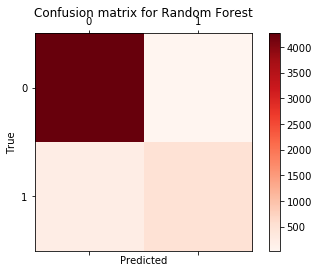

K-Nearest-Neighbors
Accuracy is 0.897
Precision is 0.98462613557
Recall is 0.903977758768


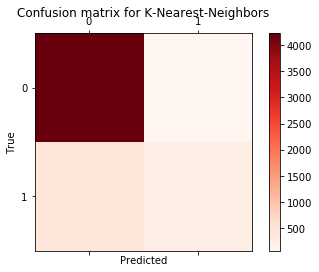

Logisitic Regression
Accuracy is 0.8644
Precision is 0.973678080596
Recall is 0.880927291886


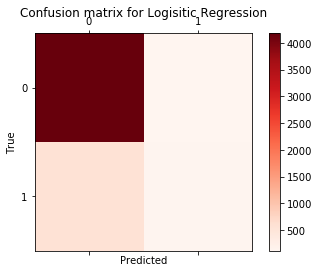

In [34]:
%matplotlib inline
draw_confusion_matrices(confusion_matrices,class_names)

### Step 4: Feature Selection
In this step, feature importance are calculated, and then be used to answer the second research question, which factors are influential on user decisions. I used both feature importance and recursive feature elimination (RFE) to select the most important features.

#### Step 4.1 - Compare Feature Importances

In [35]:
forest = RandomForestClassifier()
forest.fit(X, y)
importances = forest.feature_importances_
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print v + ": " + str(k)

Feature importance ranking by Random Forest Model:
total_day_minutes: 0.1561
total_day_charge: 0.1326
number_customer_service_calls: 0.1177
intl_plan: 0.1033
total_eve_minutes: 0.0768
total_eve_charge: 0.0626
total_intl_calls: 0.0488
total_night_minutes: 0.0467
total_night_charge: 0.0377
number_vmail_messages: 0.0376
total_intl_charge: 0.0361
total_intl_minutes: 0.0282
account_length: 0.0273
total_day_calls: 0.0265
total_night_calls: 0.0248
total_eve_calls: 0.0219
voice_mail_plan: 0.0153


#### Step 4.2 - Use Recursive Feature Elimination (RFE)

The goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features and print out the most important ones.

In [36]:
from sklearn.feature_selection import RFE
LRmodel_l2 = LogisticRegression(penalty="l2")
rfe_l2 = RFE(LRmodel_l2, n_features_to_select=1) 
rfe_l2.fit(X, y)
print "Logistic Regression (L2) RFE Result"
for k,v in sorted(zip(map(lambda x: round(x, 4), rfe_l2.ranking_), churn_feat_space.columns)):
    print v + ": " + str(k)

Logistic Regression (L2) RFE Result
total_day_minutes: 1.0
number_customer_service_calls: 2.0
intl_plan: 3.0
voice_mail_plan: 4.0
number_vmail_messages: 5.0
total_day_charge: 6.0
total_eve_charge: 7.0
total_intl_charge: 8.0
total_night_minutes: 9.0
total_eve_minutes: 10.0
total_intl_calls: 11.0
total_intl_minutes: 12.0
total_night_charge: 13.0
account_length: 14.0
total_day_calls: 15.0
total_night_calls: 16.0
total_eve_calls: 17.0


## Findings
* Past user behaviors can effectively predict future customer churn decision 
* Phone usage has a larger effects on user decision compared to user features (gender, state, SeniorCitizen)
* Usage features related to calls (e.g. total_day_charge) has a larger effect on user decision compared to usage features related to text, voice mail, etc.

## Discussion
Major limitations of the studies are the validity and size of the dataset. The Customer churn data is from a major machine learning database. The data files state that the data are "artificial based on claims similar to real world". Little is known on how the dataset is simulated/collected and processed. Based on the analysis in step 1, the dataset is in a really good quality. There are few outliers and missing data. Variables follow near normal distributions. The quality of the dataset looks too good to be a reprensentive of real data.

For the size of the dataset, there are 5000 observations in the main churn dataset. It is not a huge dataset. The size needs to be taken into consideration in avoid of overfitting or too complicated model. Additional dataset with more obervations and features would be needed for further analysis.

## Conclusion
For users, we can use past user behaviros to predict if the user is going to continue using the service in the next month or not.
Top factors affecting users' decision to continue using the service or not are: total_day_minutes, total_day_charge, number_customer_service_calls, and intl_plan.

## References 
[UW HCDS Class](https://wiki.communitydata.cc/HCDS_(Fall_2017))

[Definition of Customer Churn](https://en.wikipedia.org/wiki/Customer_attrition)

Some inspiring User Churn Studies:

[A Meta-Analysis of Churn Studies](https://medium.com/the-saas-growth-blog/a-meta-analysis-of-churn-studies-4269b3c725f6)

[9 Case Studies That’ll Help You Reduce SaaS Churn](https://conversionxl.com/blog/reduce-churn/)

[The World's Largest Study on SaaS Churn](https://blog.profitwell.com/saas-churn-benchmarks-mrr-churn-study)

[40 Customer Retention Statistics You Need to Know](https://www.getfeedback.com/blog/40-stats-churn-customer-satisfaction/)